# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

from pprint import pprint

In [66]:
output_data = pd.read_csv(output_data_file)

output_data.count()

City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [67]:
output_data.head(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [69]:
# You'll want the first URL you mentioned above to be without any { or } 
# and other dictionary-like python formatting that you see

# URL and format
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

query_url

'http://api.openweathermap.org/data/2.5/weather?appid=cab7a212be3c3d89c87352d6088183d2&units=imperial&q='

In [70]:
# Create lists to store data

name = []
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind = [] 


In [71]:
# Test the api 

city = "cape town"
response1 = requests.get(query_url + city).json()
response1


{'coord': {'lon': 18.4232, 'lat': -33.9258},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 60.26,
  'feels_like': 59.47,
  'temp_min': 57.88,
  'temp_max': 63.27,
  'pressure': 1021,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 248, 'gust': 3},
 'clouds': {'all': 0},
 'dt': 1627922100,
 'sys': {'type': 2,
  'id': 2033665,
  'country': 'ZA',
  'sunrise': 1627882672,
  'sunset': 1627920429},
 'timezone': 7200,
 'id': 3369157,
 'name': 'Cape Town',
 'cod': 200}

In [72]:
# Build a for loop to print cities

index = 0
#for city in cities[0:15]:
for city in cities:
    city = city
    try:
        response = requests.get(query_url + city).json()

        name.append(response["name"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cloudiness.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        print(f"record # {index}, city: {city}")
    
    except(KeyError):
        print("City not found, skipping record")
    
    index = index + 1
    


record # 0, city: esperance
record # 1, city: castro
record # 2, city: ponta do sol
record # 3, city: rudnogorsk
record # 4, city: saint-joseph
record # 5, city: ushuaia
record # 6, city: rikitea
record # 7, city: saint-philippe
record # 8, city: fairhope
record # 9, city: albany
City not found, skipping record
record # 11, city: saskylakh
record # 12, city: mezen
record # 13, city: vaini
record # 14, city: maxixe
record # 15, city: port alfred
record # 16, city: new norfolk
record # 17, city: mago
record # 18, city: cape town
City not found, skipping record
record # 20, city: nikolskoye
record # 21, city: bethel
record # 22, city: kodiak
record # 23, city: cabo san lucas
record # 24, city: tres palos
record # 25, city: painesville
record # 26, city: provideniya
record # 27, city: bandarbeyla
record # 28, city: bluff
record # 29, city: sao filipe
City not found, skipping record
record # 31, city: barrow
record # 32, city: jamestown
record # 33, city: thompson
record # 34, city: klaksvi

record # 280, city: hinton
record # 281, city: makakilo city
record # 282, city: marzuq
record # 283, city: korla
record # 284, city: sorland
record # 285, city: goure
record # 286, city: bowen
record # 287, city: arlit
record # 288, city: yurino
record # 289, city: zavetnoye
record # 290, city: iqaluit
record # 291, city: aktas
record # 292, city: nara
City not found, skipping record
record # 294, city: wuxue
record # 295, city: manokwari
record # 296, city: esperanza
record # 297, city: port lincoln
record # 298, city: ponferrada
record # 299, city: tifton
record # 300, city: necochea
record # 301, city: kavaratti
record # 302, city: yeppoon
City not found, skipping record
record # 304, city: oktyabrskiy
record # 305, city: kununurra
record # 306, city: rio cuarto
record # 307, city: brae
record # 308, city: saint george
City not found, skipping record
record # 310, city: kytmanovo
record # 311, city: lerwick
record # 312, city: tokur
record # 313, city: bubaque
record # 314, city: m

record # 559, city: luanda
record # 560, city: aksu
record # 561, city: carbonia
City not found, skipping record
record # 563, city: port shepstone
record # 564, city: tazovskiy
record # 565, city: culaman
record # 566, city: sept-iles
record # 567, city: balsta
record # 568, city: bambanglipuro
record # 569, city: kizukuri
record # 570, city: ashland
record # 571, city: mocuba
record # 572, city: otjimbingwe


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
weather_file = pd.DataFrame({ 
                        "City": name, "Cloudiness": cloudiness, "Country": country, 
                        "Date": date, "Humidity": humidity, "Latitude": lat, 
                        "Longitude": lng, "Max Temp": max_temp, "Wind Speed": wind})

weather_file.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Esperance,93,AU,1627922410,77,-33.8667,121.9000,49.84,9.24
1,Castro,9,BR,1627922220,51,-24.7911,-50.0119,65.48,3.49
2,Ponta do Sol,21,PT,1627922411,73,32.6667,-17.1000,81.01,4.09
3,Rudnogorsk,83,RU,1627922411,79,57.2639,103.7519,53.67,2.57
4,Saint-Joseph,28,RE,1627922412,76,-21.3667,55.6167,66.58,3.40


In [74]:
weather_file.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Latitude      523
Longitude     523
Max Temp      523
Wind Speed    523
dtype: int64

In [75]:
# To CSV

weather_file.to_csv("output_data/cities_new.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [76]:
# Isn't 100% the highest humidity can go??

humid100 = weather_file.loc[weather_file['Humidity'] > 100]
humid100.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Latitude      0
Longitude     0
Max Temp      0
Wind Speed    0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

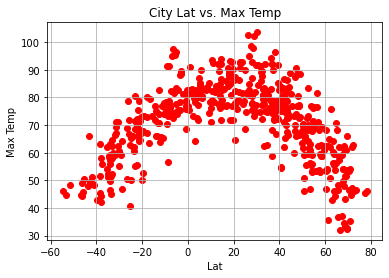

<Figure size 432x288 with 0 Axes>

In [78]:
# Chart

plt.scatter(weather_file["Latitude"], weather_file["Max Temp"], color = "red")

plt.title("City Lat vs. Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(True)
plt.show()

# Save as a png

plt.savefig("output_data/City Lat - Max Temp.png")

In [ ]:
# Chart above - higher max temperature between -20 to 40 Latitude

## Latitude vs. Humidity Plot

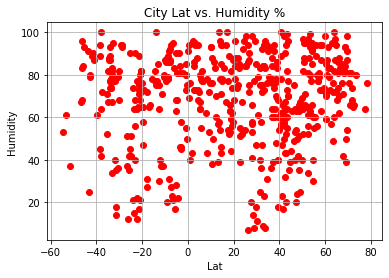

In [79]:
# Chart

plt.scatter(weather_file["Latitude"], weather_file["Humidity"], color = "red")

plt.title("City Lat vs. Humidity %")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.grid(True)

# Save as a png
plt.savefig("output_data/City Lat - Humidity.png")

In [ ]:
# Chart above - no relationship for high humidity, but low humidity between -35 to 0 and 20 -40 Latitude

## Latitude vs. Cloudiness Plot

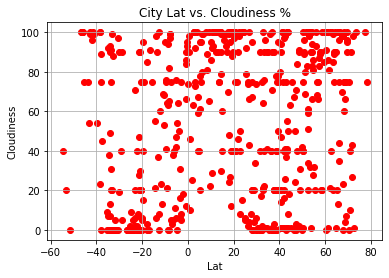

In [80]:
# Chart


plt.scatter(weather_file["Latitude"], weather_file["Cloudiness"], color = "red")

plt.title("City Lat vs. Cloudiness %")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save as a png
plt.savefig("output_data/City Lat - Cloudiness.png")

In [ ]:
# Chart above - cloudiness clustering at either high or low humidity, least cloudiness between 0 and 20 latitude

## Latitude vs. Wind Speed Plot

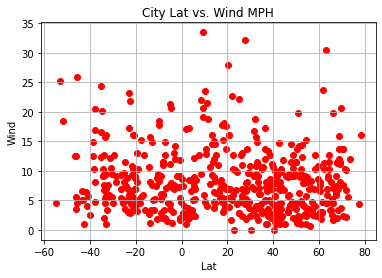

In [81]:
# Chart

plt.scatter(weather_file["Latitude"], weather_file["Wind Speed"], color = "red")

plt.title("City Lat vs. Wind MPH")
plt.xlabel("Lat")
plt.ylabel("Wind")
plt.grid(True)

# Save as a png
plt.savefig("output_data/City Lat - Wind.png")

In [ ]:
# Chart above - some high wind outliers but otherwise no correlations

## Linear Regression

In [90]:
 # Create Northern and Southern Hemisphere DataFrames
    
nh = weather_file.loc[weather_file['Latitude']>0]
sh = weather_file.loc[weather_file['Latitude']<0]

nh.count()

City          357
Cloudiness    357
Country       357
Date          357
Humidity      357
Latitude      357
Longitude     357
Max Temp      357
Wind Speed    357
dtype: int64

In [91]:
sh.count()

City          166
Cloudiness    166
Country       166
Date          166
Humidity      166
Latitude      166
Longitude     166
Max Temp      166
Wind Speed    166
dtype: int64

In [96]:
x_latnh = nh["Latitude"]
y_tempnh = nh["Max Temp"]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

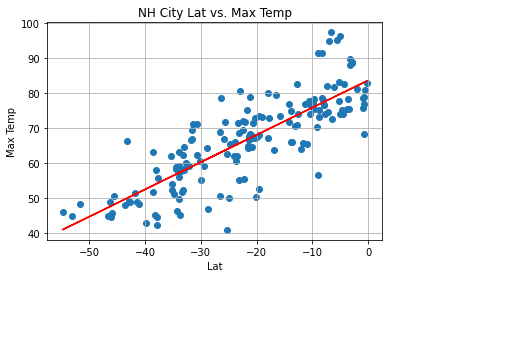

<Figure size 432x288 with 0 Axes>

In [99]:
# Add the linear regression equation and line to plot

x_values = x_latnh 
y_values = y_tempnh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH City Lat vs. Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(True)
plt.show()

plt.savefig("output_data/NH City Lat - Max Temp - Regression.png")

In [ ]:
# Chart above - relationship beetween NH city latitude and temp

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [107]:
x_latsh = sh["Latitude"]
y_tempsh = sh["Max Temp"]


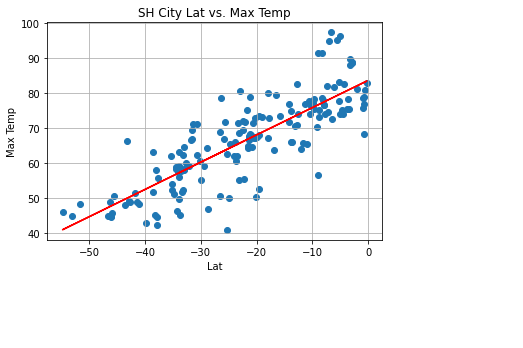

<Figure size 432x288 with 0 Axes>

In [108]:
x_values = x_latsh 
y_values = y_tempsh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("SH City Lat vs. Max Temp")
plt.xlabel("Lat")
plt.ylabel("Max Temp")
plt.grid(True)
plt.show()

plt.savefig("output_data/SH City Lat - Max Temp - Regression.png")

In [ ]:
# Chart above - relationship beetween SH city latitude and temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

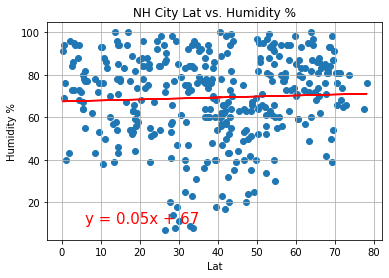

<Figure size 432x288 with 0 Axes>

In [120]:
x_latnh = nh["Latitude"]
y_humiditynh = nh["Humidity"]

# Add the linear regression equation and line to plot

x_values = x_latnh 
y_values = y_humiditynh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH City Lat vs. Humidity %")
plt.xlabel("Lat")
plt.ylabel("Humidity %")
plt.grid(True)
plt.show()

plt.savefig("output_data/NH City Lat - Humidity - Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

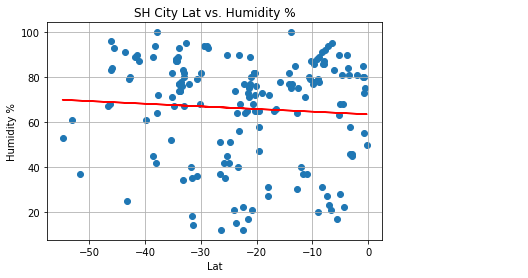

<Figure size 432x288 with 0 Axes>

In [119]:
x_latsh = sh["Latitude"]
y_humiditysh = sh["Humidity"]

# Add the linear regression equation and line to plot

x_values = x_latsh 
y_values = y_humiditysh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("SH City Lat vs. Humidity %")
plt.xlabel("Lat")
plt.ylabel("Humidity %")
plt.grid(True)
plt.show()

plt.savefig("output_data/SH City Lat - Humidity - Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

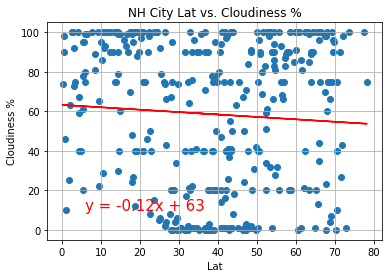

<Figure size 432x288 with 0 Axes>

In [118]:
x_latnh = nh["Latitude"]
y_cloudinessnh = nh["Cloudiness"]

# Add the linear regression equation and line to plot

x_values = x_latnh 
y_values = y_cloudinessnh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH City Lat vs. Cloudiness %")
plt.xlabel("Lat")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

plt.savefig("output_data/NH City Lat - Cloudiness - Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

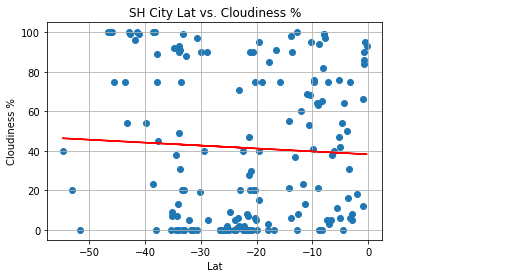

<Figure size 432x288 with 0 Axes>

In [117]:
x_latsh = sh["Latitude"]
y_cloudinesssh = sh["Cloudiness"]

# Add the linear regression equation and line to plot

x_values = x_latsh 
y_values = y_cloudinesssh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("SH City Lat vs. Cloudiness %")
plt.xlabel("Lat")
plt.ylabel("Cloudiness %")
plt.grid(True)
plt.show()

plt.savefig("output_data/SH City Lat - Cloudiness - Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

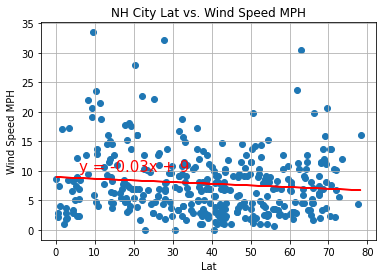

<Figure size 432x288 with 0 Axes>

In [116]:
x_latnh = nh["Latitude"]
y_windspeednh = nh["Wind Speed"]

# Add the linear regression equation and line to plot

x_values = x_latnh 
y_values = y_windspeednh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("NH City Lat vs. Wind Speed MPH")
plt.xlabel("Lat")
plt.ylabel("Wind Speed MPH")
plt.grid(True)
plt.show()

plt.savefig("output_data/NH City Lat - Wind Speed - Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

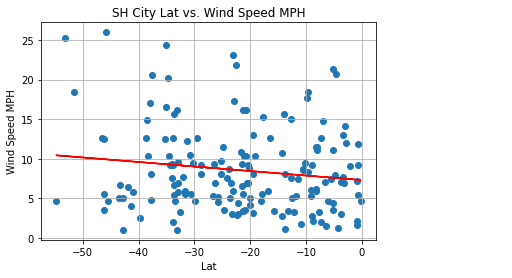

<Figure size 432x288 with 0 Axes>

In [115]:
x_latsh = sh["Latitude"]
y_windspeedsh = sh["Wind Speed"]

# Add the linear regression equation and line to plot

x_values = x_latsh 
y_values = y_windspeedsh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("SH City Lat vs. Wind Speed MPH")
plt.xlabel("Lat")
plt.ylabel("Wind Speed MPH")
plt.grid(True)
plt.show()

plt.savefig("output_data/SH City Lat - Wind Speed - Regression.png")

In [ ]:
# FINDINGS
    # higher max temperatures closer to the equator (-20 to 40) -- closer to the sun
    # more cities in the northern hemisphere -- the northern hemisphere is more industrialized and larger landmass
    # lower humidity between both -35 to 0, and 20 to 40 -- highest humidity is near the equator
    # least cloudiness between 0 to 20 -- higher amount of sunshine related to less cloudiness
    